In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) Preparing data
# 1) Model
# 2) Loss and optimizer
# 3) Training loop

In [3]:
# 0) Preparing data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

In [4]:
# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [6]:
# 2) Loss and optimizer 
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4428.4204
epoch: 20, loss = 3304.1543
epoch: 30, loss = 2490.3508
epoch: 40, loss = 1900.6647
epoch: 50, loss = 1472.9652
epoch: 60, loss = 1162.4801
epoch: 70, loss = 936.9015
epoch: 80, loss = 772.8867
epoch: 90, loss = 653.5518
epoch: 100, loss = 566.6699


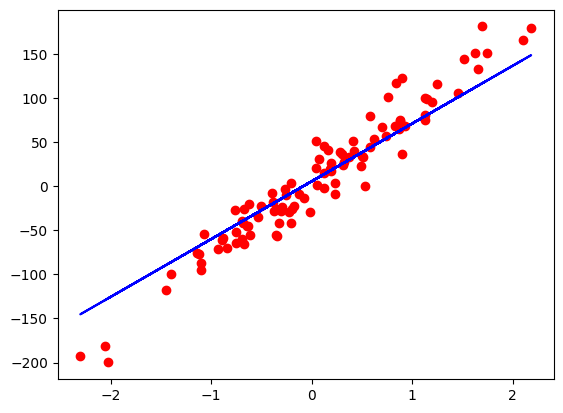

In [8]:
# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')